# Implementation of Deep Convolutional GANs
Reference: https://arxiv.org/pdf/1511.06434.pdf

#Mount

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/EVA2/Assignment6

Mounted at /content/gdrive
/content/gdrive/My Drive/EVA2/Assignment6


#Import

In [2]:
import torch
import torchvision
import numpy as np
import datetime
import os, sys
from matplotlib.pyplot import imshow, imsave
import cudas
import general_utils
from Transform_utils.transforme_album import Data
from models.Vae import VAE
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

CUDA Available? True


#Unzip

In [4]:
!unzip -q IndianCars.zip -d /content/ZData/
!mkdir /content/ZData/Train
!mv /content/ZData/IndianCars /content/ZData/Train/

#Models

In [ ]:
general_utils.getmeanstd('/content/ZData/Train/IndianCars/*')


Mean: - [0.7270403932555622, 0.7072142289814666, 0.707761554685679]
stdDev: - [0.3278671301794193, 0.3401683504330765, 0.33884424002558444]


([0.7270403932555622, 0.7072142289814666, 0.707761554685679],
 [0.3278671301794193, 0.3401683504330765, 0.33884424002558444])

Train Data size 512


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([8, 3, 128, 128])
tensor([0, 0, 0, 0, 0, 0, 0, 0])


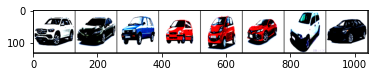

In [5]:
data = Data()
trainset = data.getTrainDataSet(train=True)
trainloader = data.getDataLoader(trainset, 32)
trainloader1 = data.getDataLoader(trainset, 8)
classes = ('Cars')
batch_size = 32
# get some random training images
dataiter = iter(trainloader1)
images, labels = dataiter.next()
print(images.shape)
print(labels)
general_utils.imshow(torchvision.utils.make_grid(images))

In [6]:
device = torch.device("cuda" if cudas.cuda else "cpu")
!rm -rf /content/ZData/*.jpg
!rm -rf Generated_models/Model*

In [7]:
from torch.autograd import Variable

IMAGE_DIM = (128, 128, 3)
ZDIMS = 256
vae = VAE().to(device)

In [8]:
from torchsummary import summary
summary(vae, input_size=(3, 128, 128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
         LeakyReLU-3           [-1, 64, 64, 64]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
       BatchNorm2d-5          [-1, 128, 32, 32]             256
         LeakyReLU-6          [-1, 128, 32, 32]               0
            Conv2d-7          [-1, 256, 16, 16]         294,912
       BatchNorm2d-8          [-1, 256, 16, 16]             512
         LeakyReLU-9          [-1, 256, 16, 16]               0
           Conv2d-10            [-1, 512, 8, 8]       1,179,648
      BatchNorm2d-11            [-1, 512, 8, 8]           1,024
        LeakyReLU-12            [-1, 512, 8, 8]               0
AdaptiveAvgPool2d-13            [-1, 512, 1, 1]               0
           Linear-14                  [

In [9]:
def get_sample_image(G, ZDIMS):
    sample = Variable(torch.randn(G, ZDIMS)).to(device)
    sample1 = vae.decode(sample)  
    img = sample1.view(G, 3, 128, 128).permute(0, 2, 3, 1)
    results = img.detach().cpu().numpy()
    result = (results+1)/2.
    return results

In [10]:
import torch
from torch import nn
from torch.optim.lr_scheduler import StepLR
step = 0
n_noise = 100
batch_size = 32
vae_opt = torch.optim.Adam(vae.parameters(), lr=0.01, betas=(0.5, 0.999))
scheduler = StepLR(vae_opt, step_size=8000, gamma=0.1)

In [11]:
from torch.nn import functional as F
def mse_loss(target, input, mu, logvar):
    #criterion = nn.L1Loss()
    criterion = nn.MSELoss()
    #mse = ((input - target) ** 2).sum() / input.data.nelement()
    mse = criterion(target, input)
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())   
    KLD /= (batch_size*3*128*128)
    return mse+KLD

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


lr :  0.01
Epoch: 0/1500, Step: 0, D Loss: 3.6833, lossmin: 100.0000, Time:16:50:58
lr :  0.01
Epoch: 3/1500, Step: 50, D Loss: 1.7979, lossmin: 100.0000, Time:16:51:03
lr :  0.01
Epoch: 6/1500, Step: 100, D Loss: 1.6453, lossmin: 100.0000, Time:16:51:08
lr :  0.01
Epoch: 9/1500, Step: 150, D Loss: 1.7104, lossmin: 100.0000, Time:16:51:13
lr :  0.01
Epoch: 12/1500, Step: 200, D Loss: 1.6356, lossmin: 100.0000, Time:16:51:19
lr :  0.01
Epoch: 15/1500, Step: 250, D Loss: 1.6060, lossmin: 100.0000, Time:16:51:24
lr :  0.01
Epoch: 18/1500, Step: 300, D Loss: 1.4861, lossmin: 100.0000, Time:16:51:29
lr :  0.01
Epoch: 21/1500, Step: 350, D Loss: 1.5012, lossmin: 100.0000, Time:16:51:34
lr :  0.01
Epoch: 25/1500, Step: 400, D Loss: 1.4373, lossmin: 100.0000, Time:16:51:39
lr :  0.01
Epoch: 28/1500, Step: 450, D Loss: 1.5955, lossmin: 100.0000, Time:16:51:45
lr :  0.01
Epoch: 31/1500, Step: 500, D Loss: 1.4949, lossmin: 100.0000, Time:16:51:50
lr :  0.01
Epoch: 34/1500, Step: 550, D Loss: 1.64

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


lr :  0.01
Epoch: 50/1500, Step: 800, D Loss: 1.3776, lossmin: 100.0000, Time:16:52:21
lr :  0.01
Epoch: 53/1500, Step: 850, D Loss: 1.3381, lossmin: 100.0000, Time:16:52:26
lr :  0.01
Epoch: 56/1500, Step: 900, D Loss: 1.2916, lossmin: 100.0000, Time:16:52:32
lr :  0.01
Epoch: 59/1500, Step: 950, D Loss: 1.3949, lossmin: 100.0000, Time:16:52:37
lr :  0.01
Epoch: 62/1500, Step: 1000, D Loss: 1.3497, lossmin: 100.0000, Time:16:52:42
lr :  0.01
Epoch: 65/1500, Step: 1050, D Loss: 1.2834, lossmin: 100.0000, Time:16:52:47
lr :  0.01
Epoch: 68/1500, Step: 1100, D Loss: 1.2678, lossmin: 100.0000, Time:16:52:53
lr :  0.01
Epoch: 71/1500, Step: 1150, D Loss: 1.2405, lossmin: 100.0000, Time:16:52:58
lr :  0.01
Epoch: 75/1500, Step: 1200, D Loss: 1.2185, lossmin: 100.0000, Time:16:53:03
lr :  0.01
Epoch: 78/1500, Step: 1250, D Loss: 1.1798, lossmin: 100.0000, Time:16:53:09
lr :  0.01
Epoch: 81/1500, Step: 1300, D Loss: 1.2624, lossmin: 100.0000, Time:16:53:14
lr :  0.01
Epoch: 84/1500, Step: 135

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


lr :  0.01
Epoch: 100/1500, Step: 1600, D Loss: 1.2457, lossmin: 100.0000, Time:16:53:44
lr :  0.01
Epoch: 103/1500, Step: 1650, D Loss: 1.2353, lossmin: 100.0000, Time:16:53:49
lr :  0.01
Epoch: 106/1500, Step: 1700, D Loss: 1.1309, lossmin: 100.0000, Time:16:53:54
lr :  0.01
Epoch: 109/1500, Step: 1750, D Loss: 1.2305, lossmin: 100.0000, Time:16:53:59
lr :  0.01
Epoch: 112/1500, Step: 1800, D Loss: 1.2166, lossmin: 100.0000, Time:16:54:04
lr :  0.01
Epoch: 115/1500, Step: 1850, D Loss: 1.1807, lossmin: 100.0000, Time:16:54:10
lr :  0.01
Epoch: 118/1500, Step: 1900, D Loss: 1.1977, lossmin: 100.0000, Time:16:54:15
lr :  0.01
Epoch: 121/1500, Step: 1950, D Loss: 1.2011, lossmin: 100.0000, Time:16:54:20
lr :  0.01
Epoch: 125/1500, Step: 2000, D Loss: 1.1492, lossmin: 100.0000, Time:16:54:25
lr :  0.01
Epoch: 128/1500, Step: 2050, D Loss: 1.1932, lossmin: 100.0000, Time:16:54:30
lr :  0.01
Epoch: 131/1500, Step: 2100, D Loss: 1.1299, lossmin: 100.0000, Time:16:54:35
lr :  0.01
Epoch: 134

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


lr :  0.01
Epoch: 150/1500, Step: 2400, D Loss: 1.1105, lossmin: 100.0000, Time:16:55:06
lr :  0.01
Epoch: 153/1500, Step: 2450, D Loss: 1.0760, lossmin: 100.0000, Time:16:55:11
lr :  0.01
Epoch: 156/1500, Step: 2500, D Loss: 1.1899, lossmin: 100.0000, Time:16:55:16
lr :  0.01
Epoch: 159/1500, Step: 2550, D Loss: 1.1284, lossmin: 100.0000, Time:16:55:22
lr :  0.01
Epoch: 162/1500, Step: 2600, D Loss: 1.1331, lossmin: 100.0000, Time:16:55:27
lr :  0.01
Epoch: 165/1500, Step: 2650, D Loss: 1.0403, lossmin: 100.0000, Time:16:55:32
lr :  0.01
Epoch: 168/1500, Step: 2700, D Loss: 1.0014, lossmin: 100.0000, Time:16:55:37
lr :  0.01
Epoch: 171/1500, Step: 2750, D Loss: 1.1297, lossmin: 100.0000, Time:16:55:42
lr :  0.01
Epoch: 175/1500, Step: 2800, D Loss: 1.1216, lossmin: 100.0000, Time:16:55:48
lr :  0.01
Epoch: 178/1500, Step: 2850, D Loss: 1.0190, lossmin: 100.0000, Time:16:55:53
lr :  0.01
Epoch: 181/1500, Step: 2900, D Loss: 1.1196, lossmin: 100.0000, Time:16:55:58
lr :  0.01
Epoch: 184

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


lr :  0.01
Epoch: 200/1500, Step: 3200, D Loss: 1.0745, lossmin: 100.0000, Time:16:56:30
lr :  0.01
Epoch: 203/1500, Step: 3250, D Loss: 1.0718, lossmin: 100.0000, Time:16:56:35
lr :  0.01
Epoch: 206/1500, Step: 3300, D Loss: 1.1366, lossmin: 100.0000, Time:16:56:40
lr :  0.01
Epoch: 209/1500, Step: 3350, D Loss: 1.0644, lossmin: 100.0000, Time:16:56:45
lr :  0.01
Epoch: 212/1500, Step: 3400, D Loss: 1.1463, lossmin: 100.0000, Time:16:56:50
lr :  0.01
Epoch: 215/1500, Step: 3450, D Loss: 1.1782, lossmin: 100.0000, Time:16:56:56
lr :  0.01
Epoch: 218/1500, Step: 3500, D Loss: 1.1326, lossmin: 100.0000, Time:16:57:01
lr :  0.01
Epoch: 221/1500, Step: 3550, D Loss: 1.1671, lossmin: 100.0000, Time:16:57:06
lr :  0.01
Epoch: 225/1500, Step: 3600, D Loss: 1.0995, lossmin: 100.0000, Time:16:57:12
lr :  0.01
Epoch: 228/1500, Step: 3650, D Loss: 1.0614, lossmin: 100.0000, Time:16:57:17
lr :  0.01
Epoch: 231/1500, Step: 3700, D Loss: 1.1079, lossmin: 100.0000, Time:16:57:22
lr :  0.01
Epoch: 234

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


lr :  0.01
Epoch: 250/1500, Step: 4000, D Loss: 1.0932, lossmin: 100.0000, Time:16:57:54
lr :  0.01
Epoch: 253/1500, Step: 4050, D Loss: 1.0983, lossmin: 100.0000, Time:16:57:59
lr :  0.01
Epoch: 256/1500, Step: 4100, D Loss: 1.1198, lossmin: 100.0000, Time:16:58:04
lr :  0.01
Epoch: 259/1500, Step: 4150, D Loss: 1.0630, lossmin: 100.0000, Time:16:58:10
lr :  0.01
Epoch: 262/1500, Step: 4200, D Loss: 1.1316, lossmin: 100.0000, Time:16:58:15
lr :  0.01
Epoch: 265/1500, Step: 4250, D Loss: 1.0948, lossmin: 100.0000, Time:16:58:20
lr :  0.01
Epoch: 268/1500, Step: 4300, D Loss: 1.1454, lossmin: 100.0000, Time:16:58:25
lr :  0.01
Epoch: 271/1500, Step: 4350, D Loss: 1.1145, lossmin: 100.0000, Time:16:58:30
lr :  0.01
Epoch: 275/1500, Step: 4400, D Loss: 1.1038, lossmin: 100.0000, Time:16:58:36
lr :  0.01
Epoch: 278/1500, Step: 4450, D Loss: 1.0589, lossmin: 100.0000, Time:16:58:41
lr :  0.01
Epoch: 281/1500, Step: 4500, D Loss: 1.0304, lossmin: 100.0000, Time:16:58:46
lr :  0.01
Epoch: 284

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


lr :  0.01
Epoch: 300/1500, Step: 4800, D Loss: 1.1639, lossmin: 100.0000, Time:16:59:18
lr :  0.01
Epoch: 303/1500, Step: 4850, D Loss: 1.0760, lossmin: 100.0000, Time:16:59:23
lr :  0.01
Epoch: 306/1500, Step: 4900, D Loss: 1.0530, lossmin: 100.0000, Time:16:59:28
lr :  0.01
Epoch: 309/1500, Step: 4950, D Loss: 1.0997, lossmin: 100.0000, Time:16:59:33
lr :  0.01
Epoch: 312/1500, Step: 5000, D Loss: 1.1143, lossmin: 100.0000, Time:16:59:39
lr :  0.01
Epoch: 315/1500, Step: 5050, D Loss: 1.1307, lossmin: 100.0000, Time:16:59:44
lr :  0.01
Epoch: 318/1500, Step: 5100, D Loss: 1.0981, lossmin: 100.0000, Time:16:59:49
lr :  0.01
Epoch: 321/1500, Step: 5150, D Loss: 1.0806, lossmin: 100.0000, Time:16:59:54
lr :  0.01
Epoch: 325/1500, Step: 5200, D Loss: 1.1242, lossmin: 100.0000, Time:17:00:00
lr :  0.01
Epoch: 328/1500, Step: 5250, D Loss: 1.1099, lossmin: 100.0000, Time:17:00:05
lr :  0.01
Epoch: 331/1500, Step: 5300, D Loss: 1.0770, lossmin: 100.0000, Time:17:00:10
lr :  0.01
Epoch: 334

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


lr :  0.01
Epoch: 350/1500, Step: 5600, D Loss: 1.1413, lossmin: 100.0000, Time:17:00:41
lr :  0.01
Epoch: 353/1500, Step: 5650, D Loss: 1.1036, lossmin: 100.0000, Time:17:00:46
lr :  0.01
Epoch: 356/1500, Step: 5700, D Loss: 1.0463, lossmin: 100.0000, Time:17:00:51
lr :  0.01
Epoch: 359/1500, Step: 5750, D Loss: 1.0540, lossmin: 100.0000, Time:17:00:57
lr :  0.01
Epoch: 362/1500, Step: 5800, D Loss: 1.0984, lossmin: 100.0000, Time:17:01:02
lr :  0.01
Epoch: 365/1500, Step: 5850, D Loss: 1.0205, lossmin: 100.0000, Time:17:01:07
lr :  0.01
Epoch: 368/1500, Step: 5900, D Loss: 1.1099, lossmin: 100.0000, Time:17:01:12
lr :  0.01
Epoch: 371/1500, Step: 5950, D Loss: 1.0890, lossmin: 100.0000, Time:17:01:18
lr :  0.01
Epoch: 375/1500, Step: 6000, D Loss: 1.0676, lossmin: 100.0000, Time:17:01:23
lr :  0.01
Epoch: 378/1500, Step: 6050, D Loss: 1.0815, lossmin: 100.0000, Time:17:01:28
lr :  0.01
Epoch: 381/1500, Step: 6100, D Loss: 1.0848, lossmin: 100.0000, Time:17:01:33
lr :  0.01
Epoch: 384

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


lr :  0.01
Epoch: 400/1500, Step: 6400, D Loss: 1.0498, lossmin: 100.0000, Time:17:02:05
lr :  0.01
Epoch: 403/1500, Step: 6450, D Loss: 1.0741, lossmin: 100.0000, Time:17:02:10
lr :  0.01
Epoch: 406/1500, Step: 6500, D Loss: 1.0748, lossmin: 100.0000, Time:17:02:15
lr :  0.01
Epoch: 409/1500, Step: 6550, D Loss: 0.9711, lossmin: 100.0000, Time:17:02:21
lr :  0.01
Epoch: 412/1500, Step: 6600, D Loss: 1.1150, lossmin: 100.0000, Time:17:02:26
lr :  0.01
Epoch: 415/1500, Step: 6650, D Loss: 1.1483, lossmin: 100.0000, Time:17:02:31
lr :  0.01
Epoch: 418/1500, Step: 6700, D Loss: 1.0582, lossmin: 100.0000, Time:17:02:36
lr :  0.01
Epoch: 421/1500, Step: 6750, D Loss: 1.0608, lossmin: 100.0000, Time:17:02:42
lr :  0.01
Epoch: 425/1500, Step: 6800, D Loss: 1.0701, lossmin: 100.0000, Time:17:02:47
lr :  0.01
Epoch: 428/1500, Step: 6850, D Loss: 1.1027, lossmin: 100.0000, Time:17:02:52
lr :  0.01
Epoch: 431/1500, Step: 6900, D Loss: 1.1007, lossmin: 100.0000, Time:17:02:57
lr :  0.01
Epoch: 434

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


lr :  0.01
Epoch: 450/1500, Step: 7200, D Loss: 1.0209, lossmin: 100.0000, Time:17:03:29
lr :  0.01
Epoch: 453/1500, Step: 7250, D Loss: 1.0967, lossmin: 100.0000, Time:17:03:34
lr :  0.01
Epoch: 456/1500, Step: 7300, D Loss: 1.1137, lossmin: 100.0000, Time:17:03:40
lr :  0.01
Epoch: 459/1500, Step: 7350, D Loss: 1.0292, lossmin: 100.0000, Time:17:03:45
lr :  0.01
Epoch: 462/1500, Step: 7400, D Loss: 1.1494, lossmin: 100.0000, Time:17:03:50
lr :  0.01
Epoch: 465/1500, Step: 7450, D Loss: 1.0480, lossmin: 100.0000, Time:17:03:56
lr :  0.01
Epoch: 468/1500, Step: 7500, D Loss: 0.9872, lossmin: 100.0000, Time:17:04:01
lr :  0.01
Epoch: 471/1500, Step: 7550, D Loss: 1.0091, lossmin: 100.0000, Time:17:04:06
lr :  0.01
Epoch: 475/1500, Step: 7600, D Loss: 1.0907, lossmin: 100.0000, Time:17:04:11
lr :  0.01
Epoch: 478/1500, Step: 7650, D Loss: 1.1815, lossmin: 100.0000, Time:17:04:17
lr :  0.01
Epoch: 481/1500, Step: 7700, D Loss: 1.0406, lossmin: 100.0000, Time:17:04:22
lr :  0.01
Epoch: 484

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


lr :  0.001
Epoch: 500/1500, Step: 8000, D Loss: 1.0901, lossmin: 100.0000, Time:17:04:54
lr :  0.001
Epoch: 503/1500, Step: 8050, D Loss: 1.0605, lossmin: 100.0000, Time:17:04:59
lr :  0.001
Epoch: 506/1500, Step: 8100, D Loss: 1.0900, lossmin: 100.0000, Time:17:05:05
lr :  0.001
Epoch: 509/1500, Step: 8150, D Loss: 1.0214, lossmin: 100.0000, Time:17:05:10
lr :  0.001
Epoch: 512/1500, Step: 8200, D Loss: 1.0874, lossmin: 100.0000, Time:17:05:15
lr :  0.001
Epoch: 515/1500, Step: 8250, D Loss: 1.0377, lossmin: 100.0000, Time:17:05:21
lr :  0.001
Epoch: 518/1500, Step: 8300, D Loss: 1.0362, lossmin: 100.0000, Time:17:05:26
lr :  0.001
Epoch: 521/1500, Step: 8350, D Loss: 1.0168, lossmin: 100.0000, Time:17:05:31
lr :  0.001
Epoch: 525/1500, Step: 8400, D Loss: 1.0911, lossmin: 100.0000, Time:17:05:36
lr :  0.001
Epoch: 528/1500, Step: 8450, D Loss: 1.1372, lossmin: 100.0000, Time:17:05:42
lr :  0.001
Epoch: 531/1500, Step: 8500, D Loss: 1.1278, lossmin: 100.0000, Time:17:05:47
lr :  0.00

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


lr :  0.001
Epoch: 550/1500, Step: 8800, D Loss: 1.1556, lossmin: 100.0000, Time:17:06:18
lr :  0.001
Epoch: 553/1500, Step: 8850, D Loss: 0.9591, lossmin: 100.0000, Time:17:06:24
lr :  0.001
Epoch: 556/1500, Step: 8900, D Loss: 1.0576, lossmin: 100.0000, Time:17:06:29
lr :  0.001
Epoch: 559/1500, Step: 8950, D Loss: 1.0802, lossmin: 100.0000, Time:17:06:34
lr :  0.001
Epoch: 562/1500, Step: 9000, D Loss: 1.1436, lossmin: 100.0000, Time:17:06:39
lr :  0.001
Epoch: 565/1500, Step: 9050, D Loss: 1.0748, lossmin: 100.0000, Time:17:06:45
lr :  0.001
Epoch: 568/1500, Step: 9100, D Loss: 1.0539, lossmin: 100.0000, Time:17:06:50
lr :  0.001
Epoch: 571/1500, Step: 9150, D Loss: 1.0910, lossmin: 100.0000, Time:17:06:55
lr :  0.001
Epoch: 575/1500, Step: 9200, D Loss: 1.0292, lossmin: 100.0000, Time:17:07:00
lr :  0.001
Epoch: 578/1500, Step: 9250, D Loss: 1.0503, lossmin: 100.0000, Time:17:07:06
lr :  0.001
Epoch: 581/1500, Step: 9300, D Loss: 1.0156, lossmin: 100.0000, Time:17:07:11
lr :  0.00

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


lr :  0.001
Epoch: 600/1500, Step: 9600, D Loss: 1.0321, lossmin: 100.0000, Time:17:07:42
lr :  0.001
Epoch: 603/1500, Step: 9650, D Loss: 1.0841, lossmin: 100.0000, Time:17:07:48
lr :  0.001
Epoch: 606/1500, Step: 9700, D Loss: 1.0572, lossmin: 100.0000, Time:17:07:53
lr :  0.001
Epoch: 609/1500, Step: 9750, D Loss: 1.0603, lossmin: 100.0000, Time:17:07:58
lr :  0.001
Epoch: 612/1500, Step: 9800, D Loss: 1.0233, lossmin: 100.0000, Time:17:08:03
lr :  0.001
Epoch: 615/1500, Step: 9850, D Loss: 1.0499, lossmin: 100.0000, Time:17:08:08
lr :  0.001
Epoch: 618/1500, Step: 9900, D Loss: 0.9766, lossmin: 100.0000, Time:17:08:13
lr :  0.001
Epoch: 621/1500, Step: 9950, D Loss: 1.1632, lossmin: 100.0000, Time:17:08:18
lr :  0.001
Epoch: 625/1500, Step: 10000, D Loss: 0.9908, lossmin: 100.0000, Time:17:08:24
lr :  0.001
Epoch: 628/1500, Step: 10050, D Loss: 1.0322, lossmin: 100.0000, Time:17:08:29
lr :  0.001
Epoch: 631/1500, Step: 10100, D Loss: 1.0479, lossmin: 100.0000, Time:17:08:34
lr :  0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


lr :  0.001
Epoch: 650/1500, Step: 10400, D Loss: 1.0860, lossmin: 100.0000, Time:17:09:05
lr :  0.001
Epoch: 653/1500, Step: 10450, D Loss: 1.0105, lossmin: 100.0000, Time:17:09:10
lr :  0.001
Epoch: 656/1500, Step: 10500, D Loss: 1.1346, lossmin: 100.0000, Time:17:09:15
lr :  0.001
Epoch: 659/1500, Step: 10550, D Loss: 1.0797, lossmin: 100.0000, Time:17:09:21
lr :  0.001
Epoch: 662/1500, Step: 10600, D Loss: 1.0705, lossmin: 100.0000, Time:17:09:26
lr :  0.001
Epoch: 665/1500, Step: 10650, D Loss: 1.0083, lossmin: 100.0000, Time:17:09:31
lr :  0.001
Epoch: 668/1500, Step: 10700, D Loss: 1.0535, lossmin: 100.0000, Time:17:09:36
lr :  0.001
Epoch: 671/1500, Step: 10750, D Loss: 1.1062, lossmin: 100.0000, Time:17:09:41
lr :  0.001
Epoch: 675/1500, Step: 10800, D Loss: 1.0670, lossmin: 100.0000, Time:17:09:47
lr :  0.001
Epoch: 678/1500, Step: 10850, D Loss: 1.0794, lossmin: 100.0000, Time:17:09:52
lr :  0.001
Epoch: 681/1500, Step: 10900, D Loss: 1.0820, lossmin: 100.0000, Time:17:09:57

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


lr :  0.001
Epoch: 700/1500, Step: 11200, D Loss: 1.0355, lossmin: 100.0000, Time:17:10:28
lr :  0.001
Epoch: 703/1500, Step: 11250, D Loss: 1.0796, lossmin: 100.0000, Time:17:10:33
lr :  0.001
Epoch: 706/1500, Step: 11300, D Loss: 1.0429, lossmin: 100.0000, Time:17:10:38
lr :  0.001
Epoch: 709/1500, Step: 11350, D Loss: 1.0736, lossmin: 100.0000, Time:17:10:43
lr :  0.001
Epoch: 712/1500, Step: 11400, D Loss: 1.1200, lossmin: 100.0000, Time:17:10:48
lr :  0.001
Epoch: 715/1500, Step: 11450, D Loss: 1.0242, lossmin: 100.0000, Time:17:10:53
lr :  0.001
Epoch: 718/1500, Step: 11500, D Loss: 1.0514, lossmin: 100.0000, Time:17:10:58
lr :  0.001
Epoch: 721/1500, Step: 11550, D Loss: 1.0940, lossmin: 100.0000, Time:17:11:03
lr :  0.001
Epoch: 725/1500, Step: 11600, D Loss: 1.0249, lossmin: 100.0000, Time:17:11:08
lr :  0.001
Epoch: 728/1500, Step: 11650, D Loss: 0.9939, lossmin: 100.0000, Time:17:11:14
lr :  0.001
Epoch: 731/1500, Step: 11700, D Loss: 1.1750, lossmin: 100.0000, Time:17:11:19

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


lr :  0.001
Epoch: 750/1500, Step: 12000, D Loss: 1.1462, lossmin: 100.0000, Time:17:11:50
lr :  0.001
Epoch: 753/1500, Step: 12050, D Loss: 1.1010, lossmin: 100.0000, Time:17:11:55
lr :  0.001
Epoch: 756/1500, Step: 12100, D Loss: 0.9946, lossmin: 100.0000, Time:17:12:00
lr :  0.001
Epoch: 759/1500, Step: 12150, D Loss: 1.0591, lossmin: 100.0000, Time:17:12:05
lr :  0.001
Epoch: 762/1500, Step: 12200, D Loss: 1.0591, lossmin: 100.0000, Time:17:12:10
lr :  0.001
Epoch: 765/1500, Step: 12250, D Loss: 1.1350, lossmin: 100.0000, Time:17:12:16
lr :  0.001
Epoch: 768/1500, Step: 12300, D Loss: 0.9952, lossmin: 100.0000, Time:17:12:21
lr :  0.001
Epoch: 771/1500, Step: 12350, D Loss: 1.1256, lossmin: 100.0000, Time:17:12:26
lr :  0.001
Epoch: 775/1500, Step: 12400, D Loss: 0.9878, lossmin: 100.0000, Time:17:12:31
lr :  0.001
Epoch: 778/1500, Step: 12450, D Loss: 1.1311, lossmin: 100.0000, Time:17:12:36
lr :  0.001
Epoch: 781/1500, Step: 12500, D Loss: 0.9866, lossmin: 100.0000, Time:17:12:42

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


lr :  0.001
Epoch: 800/1500, Step: 12800, D Loss: 1.1676, lossmin: 100.0000, Time:17:13:13
lr :  0.001
Epoch: 803/1500, Step: 12850, D Loss: 1.0940, lossmin: 100.0000, Time:17:13:19
lr :  0.001
Epoch: 806/1500, Step: 12900, D Loss: 0.9916, lossmin: 100.0000, Time:17:13:24
lr :  0.001
Epoch: 809/1500, Step: 12950, D Loss: 1.1313, lossmin: 100.0000, Time:17:13:29
lr :  0.001
Epoch: 812/1500, Step: 13000, D Loss: 1.0709, lossmin: 100.0000, Time:17:13:34
lr :  0.001
Epoch: 815/1500, Step: 13050, D Loss: 1.1082, lossmin: 100.0000, Time:17:13:40
lr :  0.001
Epoch: 818/1500, Step: 13100, D Loss: 1.0420, lossmin: 100.0000, Time:17:13:45
lr :  0.001
Epoch: 821/1500, Step: 13150, D Loss: 1.0952, lossmin: 100.0000, Time:17:13:50
lr :  0.001
Epoch: 825/1500, Step: 13200, D Loss: 1.0839, lossmin: 100.0000, Time:17:13:56
lr :  0.001
Epoch: 828/1500, Step: 13250, D Loss: 1.0629, lossmin: 100.0000, Time:17:14:01
lr :  0.001
Epoch: 831/1500, Step: 13300, D Loss: 1.0645, lossmin: 100.0000, Time:17:14:06

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


lr :  0.001
Epoch: 850/1500, Step: 13600, D Loss: 1.0078, lossmin: 100.0000, Time:17:14:38
lr :  0.001
Epoch: 853/1500, Step: 13650, D Loss: 1.1042, lossmin: 100.0000, Time:17:14:43
lr :  0.001
Epoch: 856/1500, Step: 13700, D Loss: 1.0264, lossmin: 100.0000, Time:17:14:49
lr :  0.001
Epoch: 859/1500, Step: 13750, D Loss: 1.0060, lossmin: 100.0000, Time:17:14:54
lr :  0.001
Epoch: 862/1500, Step: 13800, D Loss: 1.0621, lossmin: 100.0000, Time:17:14:59
lr :  0.001
Epoch: 865/1500, Step: 13850, D Loss: 0.9919, lossmin: 100.0000, Time:17:15:04
lr :  0.001
Epoch: 868/1500, Step: 13900, D Loss: 1.1106, lossmin: 100.0000, Time:17:15:09
lr :  0.001
Epoch: 871/1500, Step: 13950, D Loss: 1.0533, lossmin: 100.0000, Time:17:15:14
lr :  0.001
Epoch: 875/1500, Step: 14000, D Loss: 1.0612, lossmin: 100.0000, Time:17:15:20
lr :  0.001
Epoch: 878/1500, Step: 14050, D Loss: 0.9896, lossmin: 100.0000, Time:17:15:25
lr :  0.001
Epoch: 881/1500, Step: 14100, D Loss: 1.1033, lossmin: 100.0000, Time:17:15:30

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


lr :  0.001
Epoch: 900/1500, Step: 14400, D Loss: 1.0413, lossmin: 100.0000, Time:17:16:01
lr :  0.001
Epoch: 903/1500, Step: 14450, D Loss: 1.0098, lossmin: 100.0000, Time:17:16:06
lr :  0.001
Epoch: 906/1500, Step: 14500, D Loss: 1.0590, lossmin: 100.0000, Time:17:16:12
lr :  0.001
Epoch: 909/1500, Step: 14550, D Loss: 1.1229, lossmin: 100.0000, Time:17:16:17
lr :  0.001
Epoch: 912/1500, Step: 14600, D Loss: 1.0253, lossmin: 100.0000, Time:17:16:22
lr :  0.001
Epoch: 915/1500, Step: 14650, D Loss: 1.0480, lossmin: 100.0000, Time:17:16:27
lr :  0.001
Epoch: 918/1500, Step: 14700, D Loss: 1.0027, lossmin: 100.0000, Time:17:16:33
lr :  0.001
Epoch: 921/1500, Step: 14750, D Loss: 1.0638, lossmin: 100.0000, Time:17:16:38
lr :  0.001
Epoch: 925/1500, Step: 14800, D Loss: 1.0133, lossmin: 100.0000, Time:17:16:44
lr :  0.001
Epoch: 928/1500, Step: 14850, D Loss: 1.0631, lossmin: 100.0000, Time:17:16:49
lr :  0.001
Epoch: 931/1500, Step: 14900, D Loss: 1.0933, lossmin: 100.0000, Time:17:16:54

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


lr :  0.001
Epoch: 950/1500, Step: 15200, D Loss: 1.0330, lossmin: 100.0000, Time:17:17:26
lr :  0.001
Epoch: 953/1500, Step: 15250, D Loss: 1.1372, lossmin: 100.0000, Time:17:17:32
lr :  0.001
Epoch: 956/1500, Step: 15300, D Loss: 1.0571, lossmin: 100.0000, Time:17:17:37
lr :  0.001
Epoch: 959/1500, Step: 15350, D Loss: 1.0483, lossmin: 100.0000, Time:17:17:43
lr :  0.001
Epoch: 962/1500, Step: 15400, D Loss: 1.0449, lossmin: 100.0000, Time:17:17:48
lr :  0.001
Epoch: 965/1500, Step: 15450, D Loss: 1.0345, lossmin: 100.0000, Time:17:17:53
lr :  0.001
Epoch: 968/1500, Step: 15500, D Loss: 1.0787, lossmin: 100.0000, Time:17:17:58
lr :  0.001
Epoch: 971/1500, Step: 15550, D Loss: 1.0797, lossmin: 100.0000, Time:17:18:04
lr :  0.001
Epoch: 975/1500, Step: 15600, D Loss: 1.0975, lossmin: 100.0000, Time:17:18:09
lr :  0.001
Epoch: 978/1500, Step: 15650, D Loss: 1.0034, lossmin: 100.0000, Time:17:18:15
lr :  0.001
Epoch: 981/1500, Step: 15700, D Loss: 1.1441, lossmin: 100.0000, Time:17:18:20

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


lr :  0.0001
Epoch: 1000/1500, Step: 16000, D Loss: 1.1244, lossmin: 100.0000, Time:17:18:52
lr :  0.0001
Epoch: 1003/1500, Step: 16050, D Loss: 1.0930, lossmin: 100.0000, Time:17:18:58
lr :  0.0001
Epoch: 1006/1500, Step: 16100, D Loss: 1.0786, lossmin: 100.0000, Time:17:19:03
lr :  0.0001
Epoch: 1009/1500, Step: 16150, D Loss: 1.0954, lossmin: 100.0000, Time:17:19:08
lr :  0.0001
Epoch: 1012/1500, Step: 16200, D Loss: 1.1000, lossmin: 100.0000, Time:17:19:14
lr :  0.0001
Epoch: 1015/1500, Step: 16250, D Loss: 1.0678, lossmin: 100.0000, Time:17:19:19
lr :  0.0001
Epoch: 1018/1500, Step: 16300, D Loss: 0.9056, lossmin: 100.0000, Time:17:19:24
lr :  0.0001
Epoch: 1021/1500, Step: 16350, D Loss: 1.0300, lossmin: 100.0000, Time:17:19:30
lr :  0.0001
Epoch: 1025/1500, Step: 16400, D Loss: 1.0161, lossmin: 100.0000, Time:17:19:35
lr :  0.0001
Epoch: 1028/1500, Step: 16450, D Loss: 1.1020, lossmin: 100.0000, Time:17:19:41
lr :  0.0001
Epoch: 1031/1500, Step: 16500, D Loss: 0.9723, lossmin: 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


lr :  0.0001
Epoch: 1050/1500, Step: 16800, D Loss: 0.9895, lossmin: 100.0000, Time:17:20:19
lr :  0.0001
Epoch: 1053/1500, Step: 16850, D Loss: 1.0717, lossmin: 100.0000, Time:17:20:24
lr :  0.0001
Epoch: 1056/1500, Step: 16900, D Loss: 1.0193, lossmin: 100.0000, Time:17:20:29
lr :  0.0001
Epoch: 1059/1500, Step: 16950, D Loss: 1.0603, lossmin: 100.0000, Time:17:20:34
lr :  0.0001
Epoch: 1062/1500, Step: 17000, D Loss: 1.0557, lossmin: 100.0000, Time:17:20:40
lr :  0.0001
Epoch: 1065/1500, Step: 17050, D Loss: 1.0456, lossmin: 100.0000, Time:17:20:45
lr :  0.0001
Epoch: 1068/1500, Step: 17100, D Loss: 1.1284, lossmin: 100.0000, Time:17:20:50
lr :  0.0001
Epoch: 1071/1500, Step: 17150, D Loss: 1.0931, lossmin: 100.0000, Time:17:20:55
lr :  0.0001
Epoch: 1075/1500, Step: 17200, D Loss: 1.0344, lossmin: 100.0000, Time:17:21:01
lr :  0.0001
Epoch: 1078/1500, Step: 17250, D Loss: 1.0768, lossmin: 100.0000, Time:17:21:06
lr :  0.0001
Epoch: 1081/1500, Step: 17300, D Loss: 1.0874, lossmin: 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


lr :  0.0001
Epoch: 1100/1500, Step: 17600, D Loss: 1.0133, lossmin: 100.0000, Time:17:21:43
lr :  0.0001
Epoch: 1103/1500, Step: 17650, D Loss: 1.0897, lossmin: 100.0000, Time:17:21:49
lr :  0.0001
Epoch: 1106/1500, Step: 17700, D Loss: 1.1239, lossmin: 100.0000, Time:17:21:54
lr :  0.0001
Epoch: 1109/1500, Step: 17750, D Loss: 1.0416, lossmin: 100.0000, Time:17:21:59
lr :  0.0001
Epoch: 1112/1500, Step: 17800, D Loss: 1.0842, lossmin: 100.0000, Time:17:22:05
lr :  0.0001
Epoch: 1115/1500, Step: 17850, D Loss: 1.0218, lossmin: 100.0000, Time:17:22:10
lr :  0.0001
Epoch: 1118/1500, Step: 17900, D Loss: 1.0666, lossmin: 100.0000, Time:17:22:15
lr :  0.0001
Epoch: 1121/1500, Step: 17950, D Loss: 1.1154, lossmin: 100.0000, Time:17:22:21
lr :  0.0001
Epoch: 1125/1500, Step: 18000, D Loss: 1.0881, lossmin: 100.0000, Time:17:22:26
lr :  0.0001
Epoch: 1128/1500, Step: 18050, D Loss: 0.9965, lossmin: 100.0000, Time:17:22:32
lr :  0.0001
Epoch: 1131/1500, Step: 18100, D Loss: 1.0521, lossmin: 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


lr :  0.0001
Epoch: 1150/1500, Step: 18400, D Loss: 1.1213, lossmin: 100.0000, Time:17:23:10
lr :  0.0001
Epoch: 1153/1500, Step: 18450, D Loss: 1.1123, lossmin: 100.0000, Time:17:23:15
lr :  0.0001
Epoch: 1156/1500, Step: 18500, D Loss: 1.0767, lossmin: 100.0000, Time:17:23:20
lr :  0.0001
Epoch: 1159/1500, Step: 18550, D Loss: 0.9798, lossmin: 100.0000, Time:17:23:26
lr :  0.0001
Epoch: 1162/1500, Step: 18600, D Loss: 0.9956, lossmin: 100.0000, Time:17:23:31
lr :  0.0001
Epoch: 1165/1500, Step: 18650, D Loss: 1.0589, lossmin: 100.0000, Time:17:23:37
lr :  0.0001
Epoch: 1168/1500, Step: 18700, D Loss: 1.0229, lossmin: 100.0000, Time:17:23:42
lr :  0.0001
Epoch: 1171/1500, Step: 18750, D Loss: 1.0813, lossmin: 100.0000, Time:17:23:47
lr :  0.0001
Epoch: 1175/1500, Step: 18800, D Loss: 1.0511, lossmin: 100.0000, Time:17:23:53
lr :  0.0001
Epoch: 1178/1500, Step: 18850, D Loss: 1.0677, lossmin: 100.0000, Time:17:23:59
lr :  0.0001
Epoch: 1181/1500, Step: 18900, D Loss: 1.0720, lossmin: 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


lr :  0.0001
Epoch: 1200/1500, Step: 19200, D Loss: 1.0763, lossmin: 100.0000, Time:17:24:37
lr :  0.0001
Epoch: 1203/1500, Step: 19250, D Loss: 0.9634, lossmin: 100.0000, Time:17:24:42
lr :  0.0001
Epoch: 1206/1500, Step: 19300, D Loss: 1.1015, lossmin: 100.0000, Time:17:24:48
lr :  0.0001
Epoch: 1209/1500, Step: 19350, D Loss: 1.0971, lossmin: 100.0000, Time:17:24:53
lr :  0.0001
Epoch: 1212/1500, Step: 19400, D Loss: 1.0264, lossmin: 100.0000, Time:17:24:58
lr :  0.0001
Epoch: 1215/1500, Step: 19450, D Loss: 1.0682, lossmin: 100.0000, Time:17:25:04
lr :  0.0001
Epoch: 1218/1500, Step: 19500, D Loss: 1.0625, lossmin: 100.0000, Time:17:25:09
lr :  0.0001
Epoch: 1221/1500, Step: 19550, D Loss: 1.0246, lossmin: 100.0000, Time:17:25:15
lr :  0.0001
Epoch: 1225/1500, Step: 19600, D Loss: 1.1661, lossmin: 100.0000, Time:17:25:21
lr :  0.0001
Epoch: 1228/1500, Step: 19650, D Loss: 1.0884, lossmin: 100.0000, Time:17:25:26
lr :  0.0001
Epoch: 1231/1500, Step: 19700, D Loss: 0.9229, lossmin: 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


lr :  0.0001
Epoch: 1250/1500, Step: 20000, D Loss: 1.0068, lossmin: 100.0000, Time:17:26:04
lr :  0.0001
Epoch: 1253/1500, Step: 20050, D Loss: 1.1893, lossmin: 100.0000, Time:17:26:09
lr :  0.0001
Epoch: 1256/1500, Step: 20100, D Loss: 1.1422, lossmin: 100.0000, Time:17:26:14
lr :  0.0001
Epoch: 1259/1500, Step: 20150, D Loss: 1.0127, lossmin: 100.0000, Time:17:26:20
lr :  0.0001
Epoch: 1262/1500, Step: 20200, D Loss: 1.0956, lossmin: 100.0000, Time:17:26:25
lr :  0.0001
Epoch: 1265/1500, Step: 20250, D Loss: 1.1268, lossmin: 100.0000, Time:17:26:30
lr :  0.0001
Epoch: 1268/1500, Step: 20300, D Loss: 1.0648, lossmin: 100.0000, Time:17:26:35
lr :  0.0001
Epoch: 1271/1500, Step: 20350, D Loss: 1.0064, lossmin: 100.0000, Time:17:26:40
lr :  0.0001
Epoch: 1275/1500, Step: 20400, D Loss: 1.0033, lossmin: 100.0000, Time:17:26:46
lr :  0.0001
Epoch: 1278/1500, Step: 20450, D Loss: 0.9904, lossmin: 100.0000, Time:17:26:51
lr :  0.0001
Epoch: 1281/1500, Step: 20500, D Loss: 1.0771, lossmin: 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


lr :  0.0001
Epoch: 1300/1500, Step: 20800, D Loss: 1.0140, lossmin: 100.0000, Time:17:27:29
lr :  0.0001
Epoch: 1303/1500, Step: 20850, D Loss: 1.0393, lossmin: 100.0000, Time:17:27:34
lr :  0.0001
Epoch: 1306/1500, Step: 20900, D Loss: 1.0339, lossmin: 100.0000, Time:17:27:40
lr :  0.0001
Epoch: 1309/1500, Step: 20950, D Loss: 1.0440, lossmin: 100.0000, Time:17:27:45
lr :  0.0001
Epoch: 1312/1500, Step: 21000, D Loss: 1.1258, lossmin: 100.0000, Time:17:27:50
lr :  0.0001
Epoch: 1315/1500, Step: 21050, D Loss: 0.9933, lossmin: 100.0000, Time:17:27:56
lr :  0.0001
Epoch: 1318/1500, Step: 21100, D Loss: 1.0471, lossmin: 100.0000, Time:17:28:01
lr :  0.0001
Epoch: 1321/1500, Step: 21150, D Loss: 1.1160, lossmin: 100.0000, Time:17:28:07
lr :  0.0001
Epoch: 1325/1500, Step: 21200, D Loss: 1.0601, lossmin: 100.0000, Time:17:28:12
lr :  0.0001
Epoch: 1328/1500, Step: 21250, D Loss: 1.1088, lossmin: 100.0000, Time:17:28:18
lr :  0.0001
Epoch: 1331/1500, Step: 21300, D Loss: 1.1024, lossmin: 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


lr :  0.0001
Epoch: 1350/1500, Step: 21600, D Loss: 1.0581, lossmin: 100.0000, Time:17:28:56
lr :  0.0001
Epoch: 1353/1500, Step: 21650, D Loss: 1.1182, lossmin: 100.0000, Time:17:29:01
lr :  0.0001
Epoch: 1356/1500, Step: 21700, D Loss: 1.1053, lossmin: 100.0000, Time:17:29:07
lr :  0.0001
Epoch: 1359/1500, Step: 21750, D Loss: 1.0503, lossmin: 100.0000, Time:17:29:12
lr :  0.0001
Epoch: 1362/1500, Step: 21800, D Loss: 1.0564, lossmin: 100.0000, Time:17:29:18
lr :  0.0001
Epoch: 1365/1500, Step: 21850, D Loss: 1.0931, lossmin: 100.0000, Time:17:29:23
lr :  0.0001
Epoch: 1368/1500, Step: 21900, D Loss: 1.0830, lossmin: 100.0000, Time:17:29:28
lr :  0.0001
Epoch: 1371/1500, Step: 21950, D Loss: 1.0467, lossmin: 100.0000, Time:17:29:34
lr :  0.0001
Epoch: 1375/1500, Step: 22000, D Loss: 1.0664, lossmin: 100.0000, Time:17:29:39
lr :  0.0001
Epoch: 1378/1500, Step: 22050, D Loss: 1.1113, lossmin: 100.0000, Time:17:29:45
lr :  0.0001
Epoch: 1381/1500, Step: 22100, D Loss: 1.0177, lossmin: 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


lr :  0.0001
Epoch: 1400/1500, Step: 22400, D Loss: 1.0591, lossmin: 100.0000, Time:17:30:23
lr :  0.0001
Epoch: 1403/1500, Step: 22450, D Loss: 1.0767, lossmin: 100.0000, Time:17:30:28
lr :  0.0001
Epoch: 1406/1500, Step: 22500, D Loss: 1.0515, lossmin: 100.0000, Time:17:30:34
lr :  0.0001
Epoch: 1409/1500, Step: 22550, D Loss: 1.0574, lossmin: 100.0000, Time:17:30:39
lr :  0.0001
Epoch: 1412/1500, Step: 22600, D Loss: 1.1090, lossmin: 100.0000, Time:17:30:45
lr :  0.0001
Epoch: 1415/1500, Step: 22650, D Loss: 1.0487, lossmin: 100.0000, Time:17:30:50
lr :  0.0001
Epoch: 1418/1500, Step: 22700, D Loss: 1.0762, lossmin: 100.0000, Time:17:30:56
lr :  0.0001
Epoch: 1421/1500, Step: 22750, D Loss: 1.0476, lossmin: 100.0000, Time:17:31:01
lr :  0.0001
Epoch: 1425/1500, Step: 22800, D Loss: 1.0259, lossmin: 100.0000, Time:17:31:07
lr :  0.0001
Epoch: 1428/1500, Step: 22850, D Loss: 1.0670, lossmin: 100.0000, Time:17:31:12
lr :  0.0001
Epoch: 1431/1500, Step: 22900, D Loss: 1.1556, lossmin: 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


lr :  0.0001
Epoch: 1450/1500, Step: 23200, D Loss: 1.1068, lossmin: 100.0000, Time:17:31:50
lr :  0.0001
Epoch: 1453/1500, Step: 23250, D Loss: 1.0452, lossmin: 100.0000, Time:17:31:55
lr :  0.0001
Epoch: 1456/1500, Step: 23300, D Loss: 1.0158, lossmin: 100.0000, Time:17:32:00
lr :  0.0001
Epoch: 1459/1500, Step: 23350, D Loss: 1.0517, lossmin: 100.0000, Time:17:32:06
lr :  0.0001
Epoch: 1462/1500, Step: 23400, D Loss: 1.0519, lossmin: 100.0000, Time:17:32:11
lr :  0.0001
Epoch: 1465/1500, Step: 23450, D Loss: 1.0349, lossmin: 100.0000, Time:17:32:16
lr :  0.0001
Epoch: 1468/1500, Step: 23500, D Loss: 1.1382, lossmin: 100.0000, Time:17:32:21
lr :  0.0001
Epoch: 1471/1500, Step: 23550, D Loss: 1.0239, lossmin: 100.0000, Time:17:32:27
lr :  0.0001
Epoch: 1475/1500, Step: 23600, D Loss: 1.1344, lossmin: 100.0000, Time:17:32:32
lr :  0.0001
Epoch: 1478/1500, Step: 23650, D Loss: 0.9960, lossmin: 100.0000, Time:17:32:37
lr :  0.0001
Epoch: 1481/1500, Step: 23700, D Loss: 1.0752, lossmin: 1

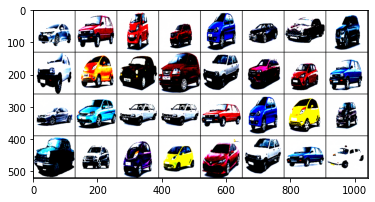

In [30]:
diff=10
max_epoch=1500
lossmin = 100
vae_a_loss = []
for epoch in range(max_epoch):
    for idx, (data1, target) in enumerate(trainloader):
        # Training Discriminator
        data = Variable(data1)
        data, target = data.to(device), target.to(device)
        x_outputs, mu, logvar = vae(data)
        vae_loss = mse_loss(x_outputs, data, mu, logvar)
        
        vae_opt.zero_grad()
        vae_loss.backward()
        vae_opt.step()  
        scheduler.step()   
        
        vae_a_loss.append(vae_loss)
        vae_opt.zero_grad()
        
        if step%50 == 0:
            dt = datetime.datetime.now().strftime('%H:%M:%S')
            for param_group in vae_opt.param_groups:
              print("lr : ",param_group['lr'])
            print('Epoch: {}/{}, Step: {}, D Loss: {:.4f}, lossmin: {:.4f}, Time:{}'.format(epoch, max_epoch, step, vae_loss.item(), lossmin, dt))
            if epoch%50==0:
              general_utils.imshow(torchvision.utils.make_grid(x_outputs.detach().cpu()))
            vae.train()
        step += 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Input
Output


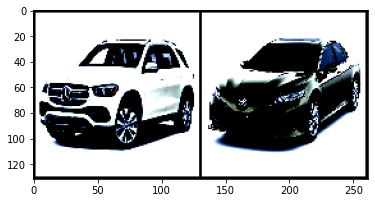

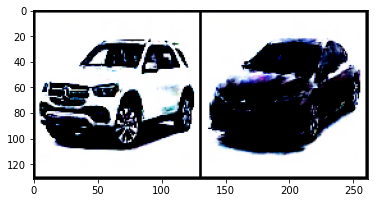

In [42]:
data = Data()
trainloader1 = data.getDataLoader(trainset, 2)
dataiter = iter(trainloader1)
images, labels = dataiter.next()
data1 = Variable(images).to(device)
x_data, mu, logvar = vae(data1)
print("Input")
general_utils.imshow(torchvision.utils.make_grid(data1.detach().cpu()))
plt.figure(0)
print("Output")
general_utils.imshow(torchvision.utils.make_grid(x_data.detach().cpu()))

#Saving model

In [43]:
torch.save(vae.state_dict(), 'Generated_models/vae_finale.pt')

#Loading model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Input
Output


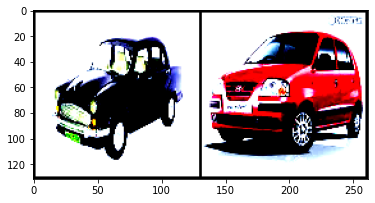

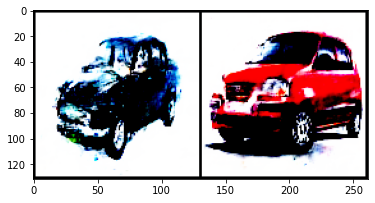

In [44]:
vae.load_state_dict(torch.load('Generated_models/vae_finale.pt'))
dataiter = iter(trainloader1)
images, labels = dataiter.next()
data1 = Variable(images).to(device)
x_data, mu, logvar = vae(data1)
print("Input")
general_utils.imshow(torchvision.utils.make_grid(data1.detach().cpu()))
plt.figure(0)
print("Output")
general_utils.imshow(torchvision.utils.make_grid(x_data.detach().cpu()))

#Random Latent Image Generation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

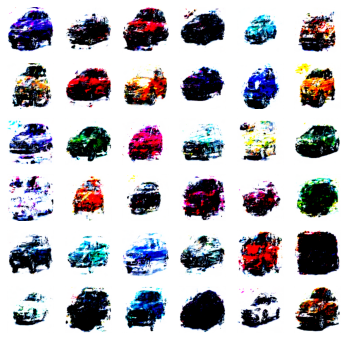

In [45]:
vae.load_state_dict(torch.load('Generated_models/vae_finale.pt'))
sample = Variable(torch.randn(36, ZDIMS)).to(device)
sample1 = vae.decode(sample)
img = sample1.view(36, 3, 128, 128).permute(0, 2, 3, 1)
img = (img.detach().cpu().numpy())  #/2.
plt.figure(figsize = (6,6))
gs1 = gridspec.GridSpec(6, 6)
gs1.update(wspace=0.0, hspace=0.0) # set the spacing between axes. 
for i in range(1,37):
    plt.subplot(6, 6, i)
    plt.axis('off')
    plt.imshow(img[i-1], 'gray')
plt.show()

#Plotting loss curve

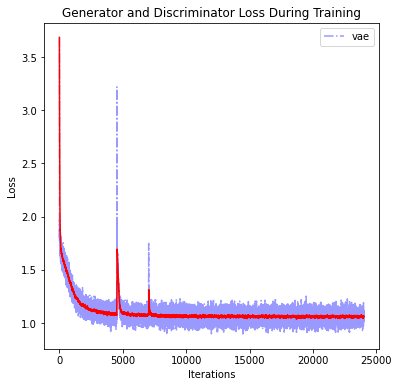

In [46]:
def smooth_curv(scalars, weight):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value
    return np.array(smoothed)
    

plt.figure(figsize = (6,6))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(vae_a_loss, 'b-.',label="vae", alpha=0.4)
plt.plot(smooth_curv(vae_a_loss, 0.95), 'r')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Saving and loading model in onnx

In [49]:
!pip install onnx onnxruntime

In [50]:
import io
import numpy as np
import torch.onnx
import copy

In [51]:
def print_size_of_model(model):
    torch.save(model.state_dict(), "temp.p")
    print('Size (MB):', os.path.getsize("temp.p")/1e6)
    os.remove('temp.p')

def print_size_of_onnx_model(model):
    onnx.save(model, 'temp.onnx')
    print('Size (MB):', os.path.getsize("temp.onnx")/1e6)
    os.remove('temp.onnx')

In [52]:
print_size_of_model(modelnet)

Size (MB): 61.176514


In [53]:
# Input to the model
torch_model = copy.deepcopy(modelnet)
torch_model = torch_model.to(device)
print(next(torch_model.parameters()).is_cuda)
batch_size = 1

x = torch.randn(64,256).to(device)
torch_out = torch_model.decode(x)

True


In [54]:
# Export the model
x = torch.randn(1,3,128,128).to(device)
torch.onnx.export(torch_model,               # model being run
                  x,                         # model input (or a tuple for multiple inputs)
                  "Generated_models/cars_vae.onnx",   # where to save the model (can be a file or file-like object)
                  export_params=True,        # store the trained parameter weights inside the model file
                  # verbose = True,
                  opset_version=10,          # the ONNX version to export the model to
                  do_constant_folding=False,  # whether to execute constant folding for optimization
                  input_names = ['input'],   # the model's input names
                  output_names = ['output'], # the model's output names
                  dynamic_axes={'input' : {0 : 'batch_size'},    # variable lenght axes
                                'output' : {0 : 'batch_size'}})

In [55]:
torch_out.shape

torch.Size([64, 3, 128, 128])

In [56]:
import onnx

onnx_model = onnx.load("Generated_models/cars_vae.onnx")

## verify the model’s structure and confirm that the model has a valid schema ##
onnx.checker.check_model(onnx_model)

In [17]:
print_size_of_onnx_model(onnx_model)

Size (MB): 61.164337


In [57]:
import onnxruntime

ort_session = onnxruntime.InferenceSession("Generated_models/cars_vae.onnx")

def to_numpy(tensor):
    return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

# compute ONNX Runtime output prediction
z1 = np.random.randn(1,3,128,128).astype(np.float32)
print(z1.shape)
ort_inputs = {ort_session.get_inputs()[0].name:z1}
ort_outs = ort_session.run(None, ort_inputs)
#np.array(ort_outs).shape

(1, 3, 128, 128)


#Quantized model creation

In [58]:
from onnxruntime.quantization import quantize
from onnxruntime.quantization import QuantizationMode

In [59]:
quantized_model = quantize(onnx_model, quantization_mode=QuantizationMode.IntegerOps, static=False)
onnx.save(quantized_model, 'Generated_models/cars.quantized.onnx')
print_size_of_onnx_model(quantized_model)

Size (MB): 49.442773


In [60]:
data = Data()
trainloader1 = data.getDataLoader(trainset, 1)

In [76]:
dataiter = iter(trainloader1)
images, labels = dataiter.next()
data1 = Variable(images)
image1 = np.array(data1)

In [77]:
import onnxruntime

ort_session = onnxruntime.InferenceSession("Generated_models/cars.quantized.onnx")

def to_numpy(tensor):
    return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

# compute ONNX Runtime output prediction
z1 = image1.astype(np.float32) 
ort_inputs = {ort_session.get_inputs()[0].name:z1}
ort_outs = ort_session.run(None, ort_inputs)
ort_outs1 = ort_outs[0]
ort_outs1.shape

(1, 3, 128, 128)

#Getting result from Quantized model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


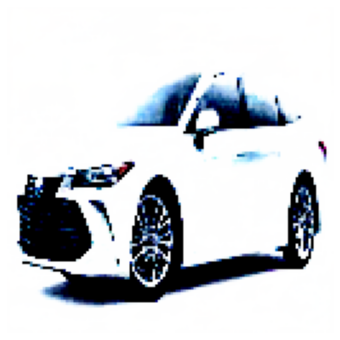

In [78]:
img = np.transpose(ort_outs1, (0, 2, 3, 1))
plt.figure(figsize = (6,6))
gs1 = gridspec.GridSpec(6, 6)
gs1.update(wspace=0.0, hspace=0.0) # set the spacing between axes. 
for i in range(1,2):
        plt.subplot(1, 1, i)
        plt.axis('off')
        plt.imshow(img[0])
plt.show() 

#Display Original Image for comparison

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


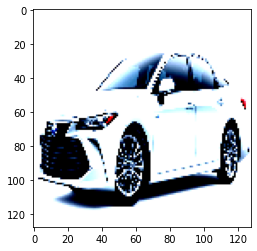

In [79]:
from google.colab.patches import cv2_imshow
general_utils.imshow(torchvision.utils.make_grid(images))